In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Первое задание

In [108]:
data = pd.read_csv('cars_moldova_clean.csv')
data.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,1,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,0,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,0,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,0,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,0,3490.0,22,13636.363636


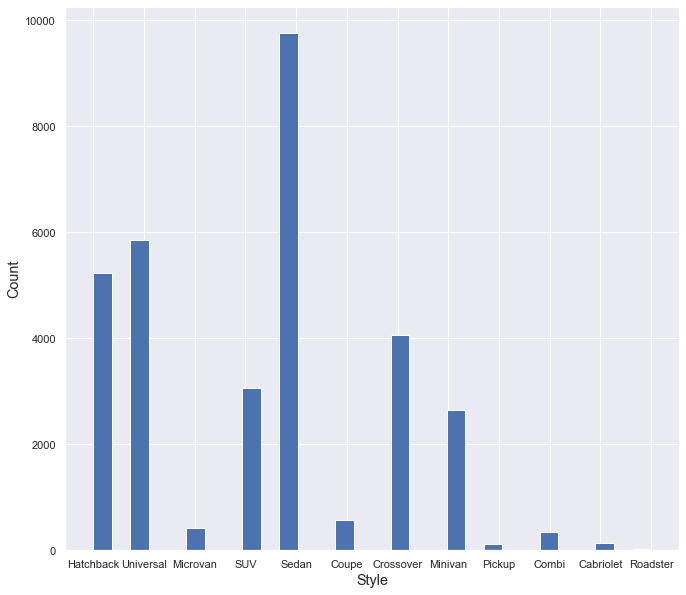

In [109]:
#Создаем отдельно plot, чтобы увеличить его размер
fig = plt.subplots(figsize=(11, 10))

#Создаем гистограмму - ось х Style машин, а ось y количество таких машин.
plt.hist(data['Style'], bins=30)

plt.xlabel('Style',fontsize='large')
plt.ylabel('Count',fontsize='large')

plt.show()

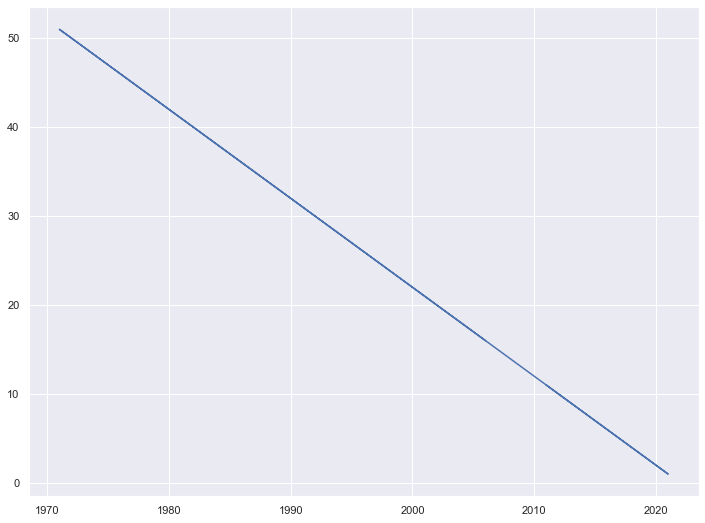

In [110]:
#Забавный и очевидный график, что возраст машины линейно зависит от даты производства
plt.plot(data.Year,data.Age)
plt.show()

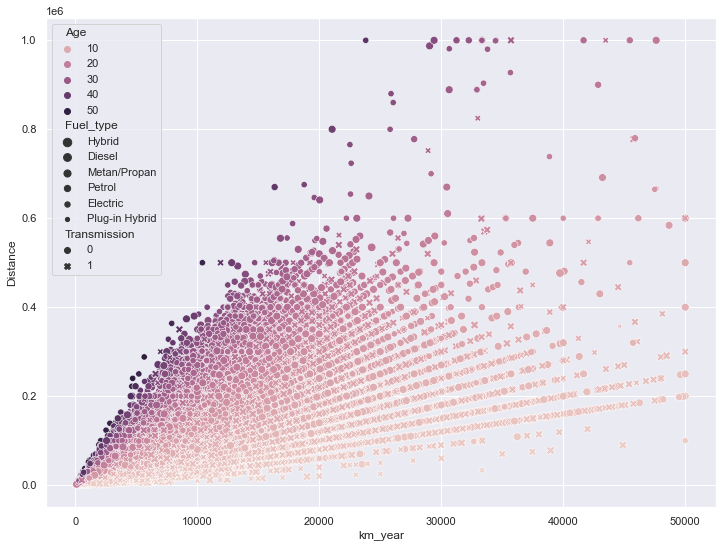

In [111]:
#Создал scatter plot с 3 категориальными признаками
sns.set(rc={'figure.figsize':(12,9)})
sns.scatterplot(data=data, x='km_year', y='Distance', hue='Age', style='Transmission',size='Fuel_type')
plt.show()

# Второе задание

In [112]:
df = data.copy()

In [113]:
#Создаем новый признак не из примеров.
df['Distance_per_price'] = df.Distance/df['Price(euro)']
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_per_price
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,1,7750.0,11,17727.272727,25.161290
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,0,8550.0,8,16875.000000,15.789474
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,0,6550.0,10,11000.000000,16.793893
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,0,4100.0,16,12500.000000,48.780488
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,0,3490.0,22,13636.363636,85.959885


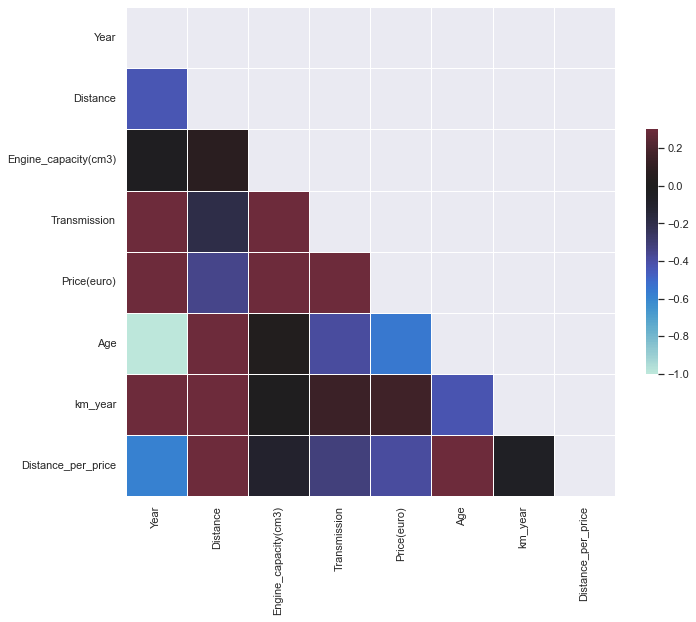

In [114]:
#Визуализируем корреляцию
corr = df.corr()

fig = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Третье задание

In [115]:
#Возьмем из блокнота второй недели разбитие колонок на категориальные и численные
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']

### Стандартизация.

In [116]:
#Создаем копию датафрейма и применяем стандартизацию
df_new  = df.copy()
df_new[num_columns] = (df[num_columns]-df[num_columns].mean())/df[num_columns].std()
df_new.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_per_price
0,Toyota,Prius,0.376492,Hatchback,0.128983,-0.112516,Hybrid,1,-0.179081,11,17727.272727,25.161290
1,Renault,Grand Scenic,0.793761,Universal,-0.490816,-0.604496,Diesel,0,-0.095044,8,16875.000000,15.789474
2,Renault,Laguna,0.515582,Universal,-0.749065,-0.604496,Diesel,0,-0.305136,10,11000.000000,16.793893
3,Opel,Astra,-0.318957,Universal,0.180633,-0.440503,Metan/Propan,0,-0.562500,16,12500.000000,48.780488
4,Mercedes,Vito,-1.153495,Microvan,1.213632,0.543457,Diesel,0,-0.626578,22,13636.363636,85.959885


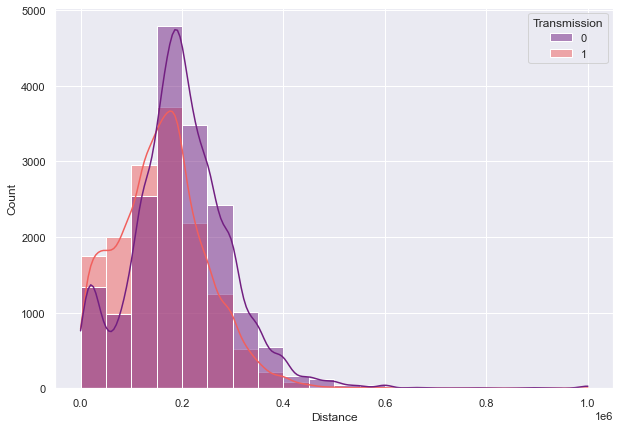

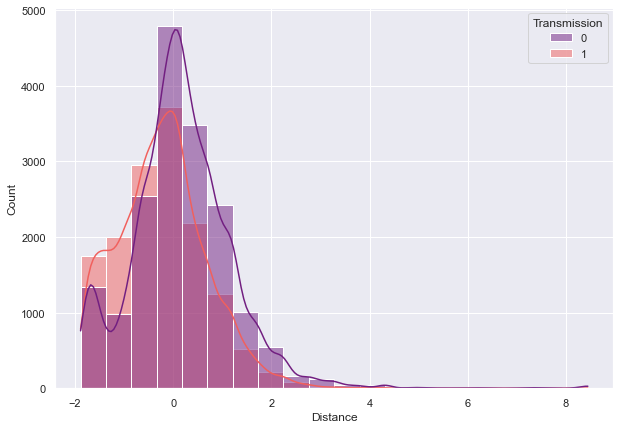

In [117]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Distance',
             hue = 'Transmission',
             bins = 20, kde = True,
             palette='magma')

fig1 = plt.figure(figsize=(10,7))
sns.histplot(data = df_new,
             x = 'Distance',
             hue = 'Transmission',
             bins = 20, kde = True,
             palette='magma')
plt.show()

In [118]:
df_new.to_csv('after_standartization.csv')

### Нормализация

In [119]:
df_new  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

df_new[num_columns] = (df[num_columns]- Xmin)/(Xmax - Xmin)
df_new.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_per_price
0,Toyota,Prius,0.80,Hatchback,0.194919,0.333333,Hybrid,1,0.075651,11,17727.272727,25.161290
1,Renault,Grand Scenic,0.86,Universal,0.134913,0.270833,Diesel,0,0.083667,8,16875.000000,15.789474
2,Renault,Laguna,0.82,Universal,0.109911,0.270833,Diesel,0,0.063627,10,11000.000000,16.793893
3,Opel,Astra,0.70,Universal,0.199920,0.291667,Metan/Propan,0,0.039078,16,12500.000000,48.780488
4,Mercedes,Vito,0.58,Microvan,0.299930,0.416667,Diesel,0,0.032966,22,13636.363636,85.959885


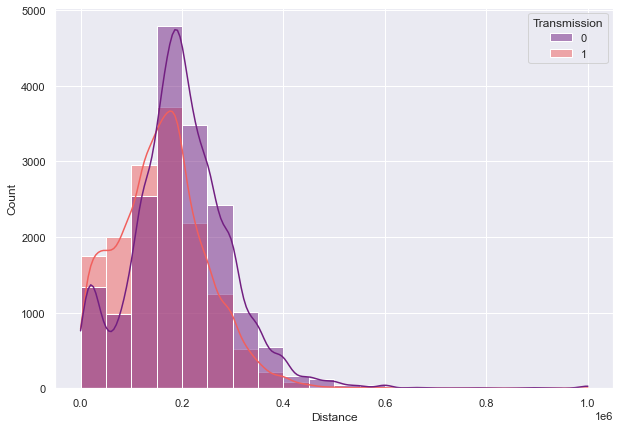

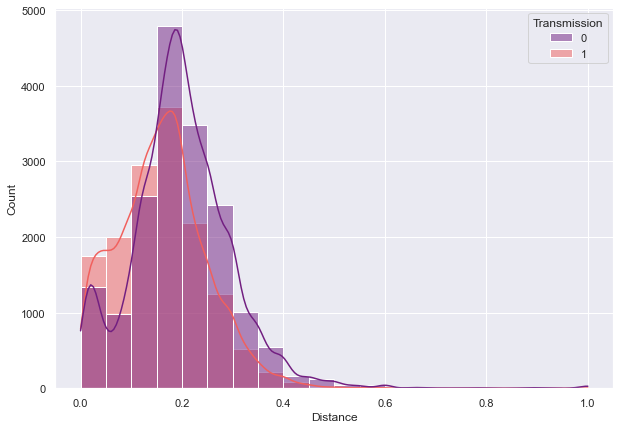

In [120]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Distance',
             hue = 'Transmission',
             bins = 20, kde = True,
             palette='magma')

fig1 = plt.figure(figsize=(10,7))
sns.histplot(data = df_new,
             x = 'Distance',
             hue = 'Transmission',
             bins = 20, kde = True,
             palette='magma')

plt.show()

In [121]:
df_new.to_csv('after_normalization.csv')

### Cтепенное преобразование 

In [122]:
#Используем функцию логарифма для степенного преобразования
df_new  = df.copy()
df_new[num_columns] = np.log(df_new[num_columns])
df_new.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_per_price
0,Toyota,Prius,7.606387,Hatchback,12.180755,7.495542,Hybrid,1,8.955448,11,17727.272727,25.161290
1,Renault,Grand Scenic,7.607878,Universal,11.813030,7.313220,Diesel,0,9.053687,8,16875.000000,15.789474
2,Renault,Laguna,7.606885,Universal,11.608236,7.313220,Diesel,0,8.787220,10,11000.000000,16.793893
3,Opel,Astra,7.603898,Universal,12.206073,7.377759,Metan/Propan,0,8.318742,16,12500.000000,48.780488
4,Mercedes,Vito,7.600902,Microvan,12.611538,7.696213,Diesel,0,8.157657,22,13636.363636,85.959885


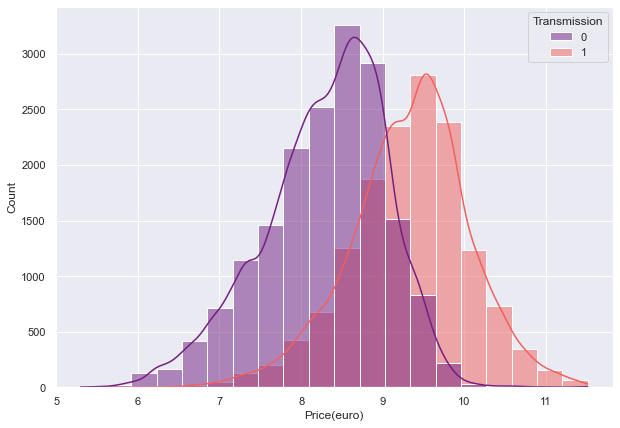

In [123]:
#Визуализируем полученные данные
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df_new,
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 20,kde = True,
             palette='magma')
plt.show()

In [124]:
df_new.to_csv('after_log.csv')

### Ordinal / One-Hot Encoding

In [125]:
#Создадим новый категориальный признак, чтобы затем его Ordinal Encoding
#Создаем признак на основе квантилей
conditions = [
    (df['Price(euro)'] <= data['Price(euro)'].quantile(0.25)),
    (df['Price(euro)'] > data['Price(euro)'].quantile(0.25)) & (df['Price(euro)'] < data['Price(euro)'].quantile(0.75)),
    (df['Price(euro)'] >= data['Price(euro)'].quantile(0.75))
]

values = ['Cheap','Affordable','Luxury']
df['Car_Status'] = np.select(conditions,values)
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_per_price,Car_Status
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,1,7750.0,11,17727.272727,25.161290,Affordable
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,0,8550.0,8,16875.000000,15.789474,Affordable
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,0,6550.0,10,11000.000000,16.793893,Affordable
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,0,4100.0,16,12500.000000,48.780488,Affordable
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,0,3490.0,22,13636.363636,85.959885,Cheap


In [126]:
#Ordinal Encoding
df['Car_Status'] = df['Car_Status'].map({'Cheap': 0, 'Affordable': 1,'Luxury':2})
df.sample(10)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,Distance_per_price,Car_Status
24130,Opel,Rare,1999,SUV,320147.0,3200.0,Petrol,1,1000.0,23,13919.434783,320.147,0


In [127]:
df.to_csv('after_ordinal_encoding.csv')